In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import random

In [2]:
from main import srs_selection
from main import clc_selection
from main import mms_selection
from main import des_selection
from main import dom_selection
from main import phl_selection
from main import nrmd_selection
from main import psa_selection

In [3]:
def plot_dataset(X0,X1,X2,X0_res=None,X1_res=None,X2_res=None):
    plt.scatter(X0[:, 0], X0[:, 1], marker='o', edgecolors='blue', facecolors='none', label='Clase 0')
    plt.scatter(X1[:, 0], X1[:, 1], marker='o', edgecolors='red', facecolors='none', label='Clase 1')
    plt.scatter(X2[:, 0], X2[:, 1], marker='o', edgecolors='green', facecolors='none', label='Clase 2')
    if X0_res is not None:
        plt.scatter(X0_res[:, 0], X0_res[:, 1], marker='o', edgecolors='blue', label='Clase 0')
        plt.scatter(X1_res[:, 0], X1_res[:, 1], marker='o', edgecolors='red', label='Clase 1')
        plt.scatter(X2_res[:, 0], X2_res[:, 1], marker='o', edgecolors='green', label='Clase 2')

Creamos el dataset

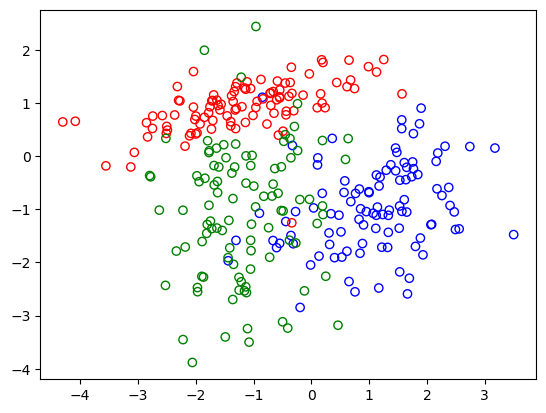

In [4]:
X,y=make_classification(n_samples=300, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0)

X0 = X[y == 0]
X1 = X[y == 1]
X2 = X[y == 2]

plot_dataset(X0,X1,X2)

Fijamos el porcentaje

In [5]:
perc=0.50

Ejemplo de SRS

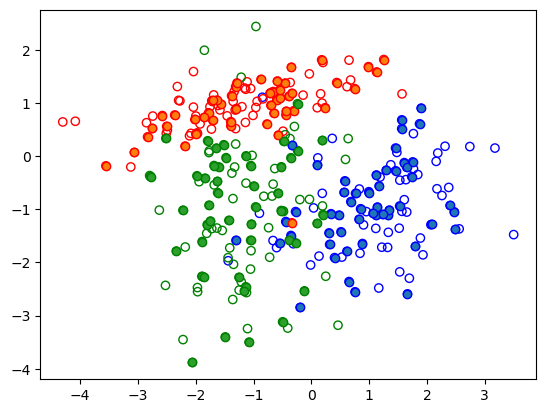

In [6]:
X_res, y_res = srs_selection(X,y,perc)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1]  
X2_res=X_res[y_res==2] 

plot_dataset(X0,X1,X2,X0_res,X1_res,X2_res)

Ejemplo de Clustering Centroids

C:\Users\Javier\.conda\envs\survey_green_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Javier\.conda\envs\survey_green_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Javier\.conda\envs\survey_green_dl\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


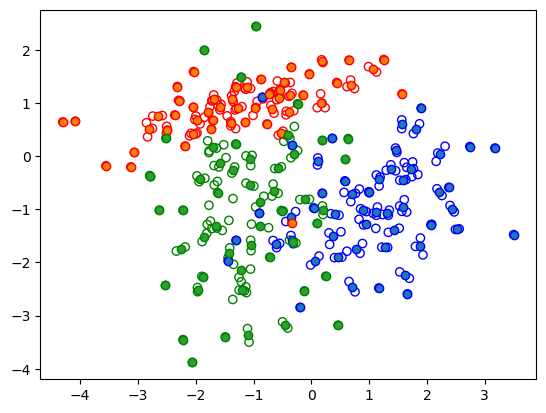

In [7]:
X_res, y_res = clc_selection(X,y,perc)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 
X2_res=X_res[y_res==2] 

plot_dataset(X0,X1,X2,X0_res,X1_res,X2_res)

Ejemplo de Maxmin

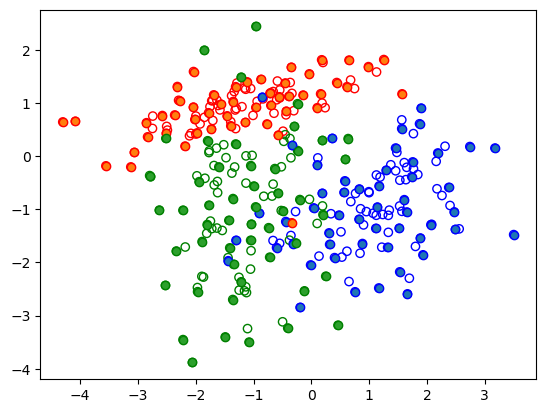

In [8]:
X_res, y_res = mms_selection(X,y,perc,p=np.inf)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1]  
X2_res=X_res[y_res==2] 

plot_dataset(X0,X1,X2,X0_res,X1_res,X2_res)

Ejemplo de Distance-Entropy Selection

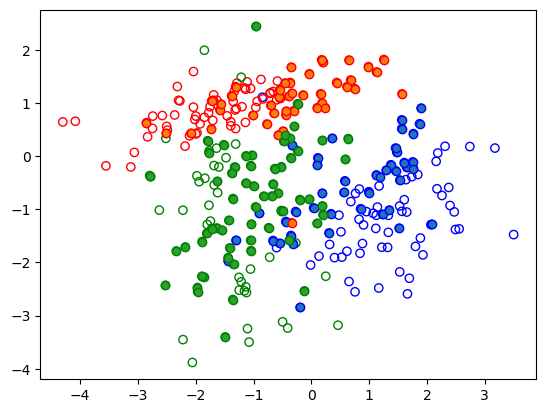

In [9]:
X_res, y_res = des_selection(X, y, perc, perc_base=0.2)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 
X2_res=X_res[y_res==2] 

plot_dataset(X0,X1,X2,X0_res,X1_res,X2_res)

Ejemplo de Dominating Dataset (¿Habría que hacer algo para relacionar $\varepsilon$ y perc?)

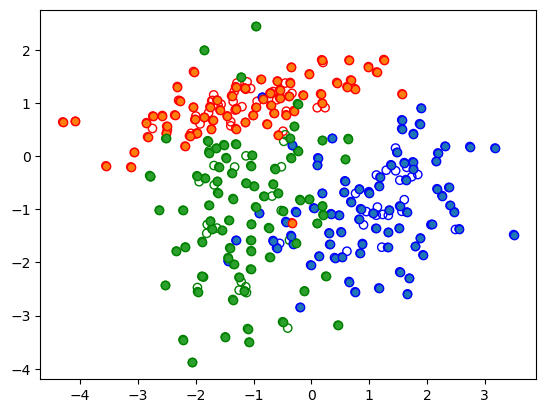

In [10]:
X_res, y_res = dom_selection(X,y,epsilon=0.12)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1]  
X2_res=X_res[y_res==2] 

plot_dataset(X0,X1,X2,X0_res,X1_res,X2_res)

In [11]:
len(y_res)/len(y)*100

73.0

Ejemplo de PH Landmarks

C:\Users\Javier\.conda\envs\survey_green_dl\lib\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
C:\Users\Javier\.conda\envs\survey_green_dl\lib\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
C:\Users\Javier\.conda\envs\survey_green_dl\lib\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
C:\Users\Javier\.conda\envs\survey_green_dl\lib\site-packages\ripser\ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(
C:\Users\Javier\.conda\envs\survey_green_dl\lib\

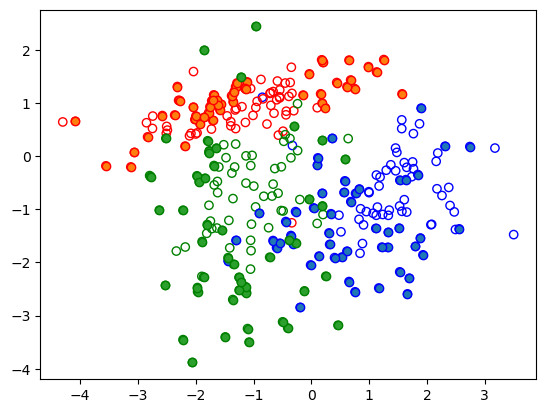

In [12]:
X_res, y_res = phl_selection(X, y, topological_radius=1, perc=perc, scoring_version='multiDim', dimension=1, landmark_type='vital')

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 
X2_res=X_res[y_res==2] 

plot_dataset(X0,X1,X2,X0_res,X1_res,X2_res)

Ejemplo de Data Reduction with Matrix Decomposition

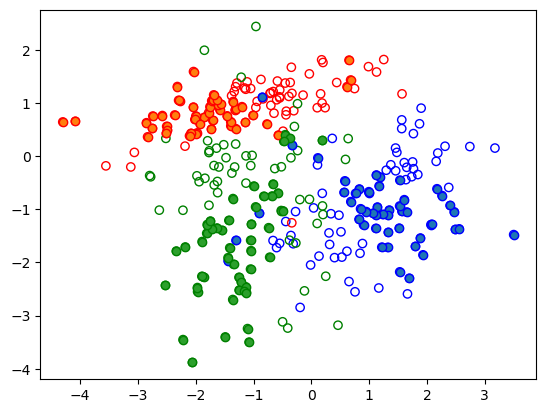

In [13]:
X_res, y_res = nrmd_selection(X,y,perc,method='SVD_python')

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 
X2_res=X_res[y_res==2] 

plot_dataset(X0,X1,X2,X0_res,X1_res,X2_res)

Ejemplo de Principal Sample Analysis

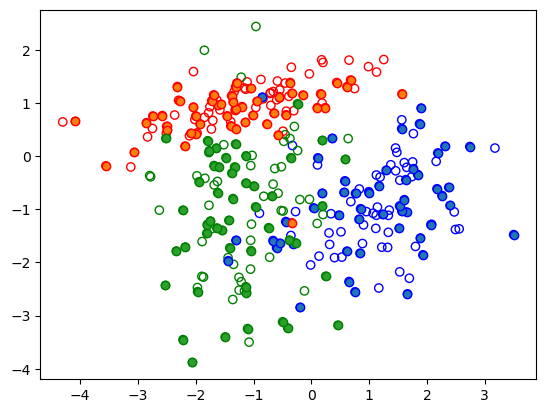

In [14]:
X_res, y_res = psa_selection(X,y,perc,RANSAC=20)

X0_res=X_res[y_res==0]
X1_res=X_res[y_res==1] 
X2_res=X_res[y_res==2] 

plot_dataset(X0,X1,X2,X0_res,X1_res,X2_res)